## Lab 6: Exploring Data Sets - Midterm Project: The Risks of Steak

Lillian Ellis

Created October 30, 2018

**Abstract:**

In this lab, I worked with a dataset surrounding a survey pulled from Nate Silver's Five Thirty Eight article surrounding eating steak. This dataset is from May 7th and 8th of 2018. The data contains information from a survey sent out to 550 people around the country. This survey was also conducted by Nate Silver and the team at Five Thirty Eight. The questions of this survey surround risks taken in everyday life, information surrounding gender, income, education, and if and how the survey-taker eats steak. Throughout my lab, I worked to figure out trends for those who eat or choose not to eat steak. By the end of the lab, I came to a few conclusions about eating steak and other factors I discovered throughout my analsis. This data surrounded a topic unlike anything I had done in the past, and it was interesting to explore!

Overarching Questions:
- Are smokers more likely to eat steak? Those who drink? Skydive? Cheat?
- What about those who identify as female? male? Have larger incomes? 
- Overall, are people who take risks more likely to eat steak?




Link to data set on GitHub: https://github.com/fivethirtyeight/data/tree/master/steak-survey

Link to FiveThirtyEight article: https://fivethirtyeight.com/features/how-americans-like-their-steak/ 

Link to download dataset: https://data.fivethirtyeight.com

How I chose this data: 
- At first, I was really interested in a polling dataset from FiveThirtyEight, but I decided that it did not pose a lot of interesting questions around possible trends or correlations of the dataset for the November elections.
- I have learned that it can be hard to find a dataset that is both interesting in quality, but also clean and easy to manage. The data set I have chosen I think is super interesting, and it is pretty clean. 
- Overall, my personal understanding surrounding what makes a good data set has shifted more from how pretty the data set looks or how serious the topic of the data is to how many questions that your data can help you answer. The topic I deal with throughout this lab is not serious, but I can ask lots of questions surrounding data from the survey. I am excited to see what I can find!

**Data Set Preparation:**

Here, importing all of the pandas packages for the remainder of the lab

In [134]:
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns #(sam seaborn!!)
import statsmodels.api as sm
import statsmodels.formula.api as smf
#Important - upgrade seaborn to 9.0
#these imports are useful to purpose
#general purpose packages


#makes the graphs visible in this notebook 
%matplotlib inline

First, I am printing the header to take a first glance at how my data set looks when it is read-in. I define my data set as steak, and then call the dataset in under its csv file name.

In [101]:
#importing stake survey data set
#one line to open and read a csv filed into a data frame data structure
steak = pd.read_csv('steak-risk-survey.csv')

#print the first few lines of the data frame, default is 5 lines
steak.head()

,RespondentID,"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,3.234973e+09,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
4,3.234972e+09,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England


A great way to take a clean first look at my data is printing its head, info and describe methods. These display overarching information about my dataset that will be useful throughout the remainder of my lab!

In [102]:
steak.info()
steak.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 15 columns):
RespondentID                                                                                                                                                                                                                                                                         550 non-null float64
Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?    547 non-null object
Do you ever smoke cigarettes?                                                                                                                                                                                                                                                        538 non-null object
Do 

,RespondentID
count,5.500000e+02
mean,3.234845e+09
std,1.265754e+05
min,3.234760e+09
25%,3.234800e+09
50%,3.234835e+09
75%,3.234875e+09
max,3.237566e+09


**Dataset Information:**

- My data set has 552 Rows and 15 columns
- My dataset is pulled from FiveThirtyEight, and it is based off of a survey conducted by Nate Silver and his team. On May 7th and 8th of this year, 550 people filled out this survey. 
- A lot of my data is binary, as my data set covers questions with two answers. These questions cover topics surrounding skydiving, gambling, smoking, and eating steak (a lot of Yes or No questions)
- My data is also filled with some categorical data, as the survey prompts for a gender identification of the user, a selection of a range of their household income, and how they like their steak cooked. 


**Data Cleaning:**

On Missing Data: 
- I do have some missing data, as some survey-takers answered some questions and not others
- I plan to use the data they have provided through their responses to the survey (So I will keep all NaN values)
- Specifically, some survey-responders answered some information but not others. I am planning on discrediting all of the information without answers about whether they eat steak or not. However, this decision may change depending on what I end up analyzing. 


Variables I plan to use:
- Because most of my data is binary, I will use a lot of it through overlapping different variables. 
- Including: eating steak, and risk factors: skydiving, smoking, cheating, gambling, etc. 
- I want to combine, throughout graphs and possibly new variables, counts surrounding skydiving, smoking, cheating, gambling, gender identification, etc. 
    - Hopefully I can figure out a way to do this through creating a new column that combines other columns of binary data 
- This is so I can analyze the risk factors all together against the variable of steak. From there, I can compare factors such as gender, income, etc. 


Analysis I hope to do:
- I am planning to analyze the possible correlation between taking certain types of risks and eating steak. I plan to do this by overlapping the data I have involving risks
- I also plan to analyze a possible correlation from eating steak to things like gender, income, education, age, and location. Maybe I’ll find other information as I go not even about steak! 


**Data Cleaning Tasks:**
The first thing I noticed was when I read in the header was that there was a seperate column for the word "Response". I decided to take that out, becasue it provides no information I need and does not represent a legit response. It is another title. I also changes Yes: 1 and No: 0. I made this change so it was easier to look and read in the numbers. It also converts these strings to numerical values! This should be helpful for my analysis to come. I also renamed column headers to clean up my data and to make it easier to refrence throughout my code (note: even if I end up not using all of the columns listed, I am going to keep them just incase I may want to utilize or compare them later on)

(Note: originally, I wanted to replace NaN with x to make the data nicer for me to look at, but I quickly realized that this would have been a completley unnessecary clean and it acctually impared me from running a graph because my code would error as non-numerical values. I quickly made this fix after realizing that replacing x was not a good idea, and decided to keep NaN as a value because it is a super helpful one!- this original code is below, commented-out)

In [103]:
#Deleted cleaning:
#filling null values with x through the .fillna method 
#steak = steak.fillna('x')
#print head with "head" method to display replaced null values 
#steak.head()

In [135]:
#Next, replacing Yes and NO with number values to clear up data set 
#permanently changing data frame by redefining it 
#using: replace method, calling specific indexes
steak = steak.replace(['Yes', 'No'], [1,0])
#print head with "head" method to display this change
steak.head()


,ID,lottery,smoke,alcohol,gamble,skydiving,speeding,cheated,steak,prepared,gender,age,income,education,location,smoke and gamble,smoke and cheated,speeding and alcohol
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central,1.0,1.0,3.0
3,3.234973e+09,Lottery A,0.0,1.0,1.0,0.0,1.0,1.0,1.0,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic,3.0,3.0,4.0
4,3.234972e+09,Lottery B,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England,4.0,4.0,4.0
5,3.234959e+09,Lottery B,0.0,1.0,0.0,0.0,1.0,1.0,1.0,Medium,Male,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic,1.0,3.0,4.0


In [136]:
#the drop method drops index 0 as the response info is not needed
#inplace = True is needed here to replace everything for my data going forward (to solidify my change)
steak.drop(steak.index[[0]], inplace = True)
steak.head()

,ID,lottery,smoke,alcohol,gamble,skydiving,speeding,cheated,steak,prepared,gender,age,income,education,location,smoke and gamble,smoke and cheated,speeding and alcohol
2,3.234982e+09,Lottery A,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central,1.0,1.0,3.0
3,3.234973e+09,Lottery A,0.0,1.0,1.0,0.0,1.0,1.0,1.0,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic,3.0,3.0,4.0
4,3.234972e+09,Lottery B,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England,4.0,4.0,4.0
5,3.234959e+09,Lottery B,0.0,1.0,0.0,0.0,1.0,1.0,1.0,Medium,Male,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic,1.0,3.0,4.0
6,3.234955e+09,Lottery A,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium rare,Male,18-29,"$0 - $24,999",Some college or Associate degree,West South Central,1.0,1.0,2.0


Finally, I decided to additionally rename each column with clearer, more consise titles. 

In [106]:
#Finally, I am renaming column headers
#With the rename method, I called the header name and renamed it

#Inplace directly replaces the name into my list 
#This makes a permanent change, a view (not just editing the view)

steak.rename(columns = {
    list(steak)[0] : 'ID',
    list(steak)[1] : 'lottery',
    list(steak)[2]: 'smoke',
    list(steak)[3] : 'alcohol',
    list(steak)[4] : 'gamble',
    list(steak)[5] : 'skydiving',
    list(steak)[6] : 'speeding',
    list(steak)[7] : 'cheated',
    list(steak)[8] : 'steak',
    list(steak)[9] : 'prepared',
    list(steak)[10] : 'gender',
    list(steak)[11] : 'age',
    list(steak)[12] : 'income',
    list(steak)[13] : 'education',
    list(steak)[14] : 'location',
    },
          inplace = True)

steak.head()

,ID,lottery,smoke,alcohol,gamble,skydiving,speeding,cheated,steak,prepared,gender,age,income,education,location
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,0,1,0,0,0,0,1,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,3.234973e+09,Lottery A,0,1,1,0,1,1,1,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
4,3.234972e+09,Lottery B,1,1,1,0,1,1,1,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England
5,3.234959e+09,Lottery B,0,1,0,0,1,1,1,Medium,Male,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic


**Data Modeling**

The first approach to my data modeling section of this lab was to line up certain variables with the answer to the steak prompt. (So seeing if there was a correlation between steak and risks such as alcohol, gamble, skydiving, speeding, etc.) 

At first, I just printed some simple bar graphs which displayed a brief insight into correlation between certain risks and other variables with eating steak. These are initially pretty straight forward and not super complex graphs, but they helped build the foundation for the rest of the questions I began to ask myself throughout the lab.

First, relationship between steak and alcohol through a bar plot

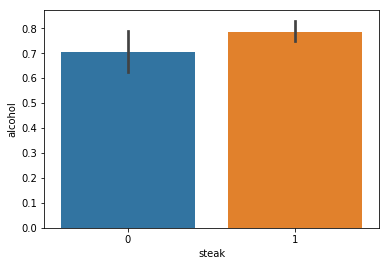

In [107]:
#plot the data using barplot method

#display a graph plotting alcohol v eating steak
sns.barplot(x="steak", y="alcohol", data = steak)

This graph was a great first one to look at, as it layed foundation with the analysis that those who drink more alcohol are more likley to eat steak.

Then, I began to combine two risk factors and I compared those with eating steak (the bar graph below is alchohol, gambling compared with eating steak)

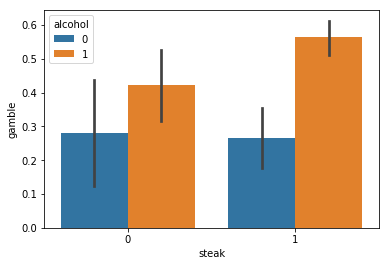

In [108]:
#steak and gambling with alchohol as well 
sns.barplot(x="steak", y="gamble", hue = "alcohol", data = steak)

The above graph indicated that there is a strong correlation between those who drink and gamble with eating steak. This is great information to go off of for the rest of my lab. If these two risk factors align with eating steak, maybe others will as well!

Steak and speeding

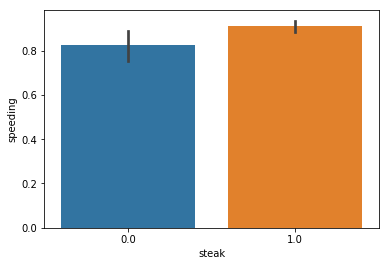

In [139]:
#steak and speeding 
sns.barplot(x="steak", y = "speeding", data = steak)

This is interesting, as it suggests that there is another strong correlation between those that speed and those that eat steak. 

Steak and Cheating

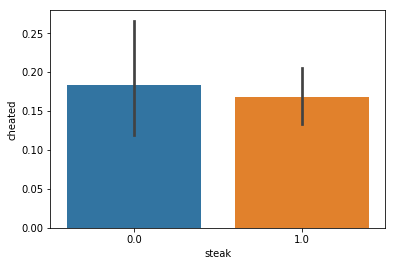

In [140]:
#steak and cheating on spouse
sns.barplot(x="steak", y="cheated", data = steak)

This is interesting, because of out of those on the survey, there is a stronger correlation between having cheated and NOT eating steak. 

Steak and gender 

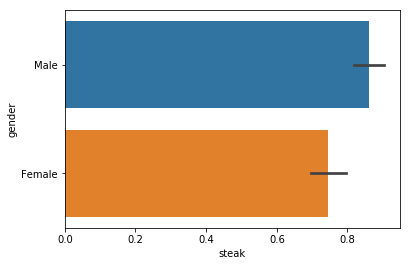

In [111]:
#steak and gender identification 
sns.barplot(x="steak", y="gender", data = steak)

Overall, out of those who took this survey, males are more likley to eat steak than females 

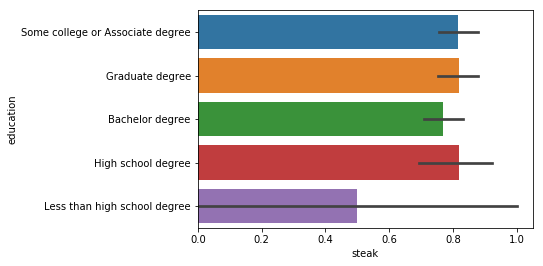

In [141]:
sns.barplot(x="steak", y="education", data = steak)

According to the graph above, those who have a high school degree showed the largest correlation to eating steak by an extremley small margin. Those with a college or associate degree or a graduate degree were extremley close seconds. Those who have a bachelor degree was last- and those with less than a high school degree had by far the smallest correlation. 

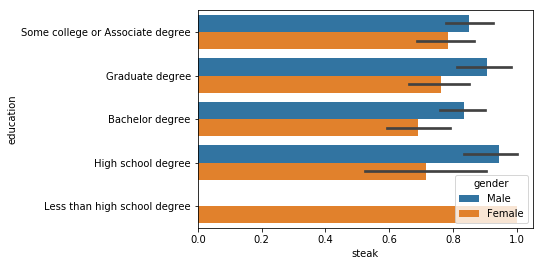

In [112]:
#steak, education, gender
sns.barplot(x="steak", y="education", hue = "gender", data = steak)

It's interesting above that males correlate stronger with steak for all categories of education execpt for less than a high school degree. My guess is that this survey is targeting an audience that seems to have a heavy-response in those who have high school degrees and above. Because according to the graph above this one, overall, males tend to eat more steak than females according to the survey. This seems to be the case of an outlier. It would have been interesting to have a larger sample of people fill out the survey to see how these graphs could shift.

Steak and income

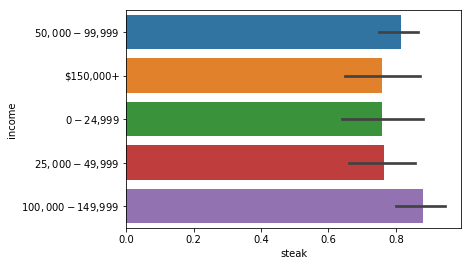

In [113]:
#income and steak 
sns.barplot(x="steak", y="income", data = steak)

According to the above graph, those who eat the most steak tend (by a fairly significant margin) to be in the income range of 100,000-149,999. This range is the second wealthiest range of income. Also, the income range of 50,000-99,999 has the second strongest correlation to eat steak by a smaller but also pretty significant margin. The other three income ranges (the smallest, largest, and second smallest) are all of about the same correlation to eating steak. 

Steak and location 

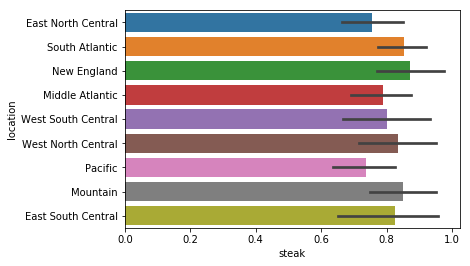

In [114]:
#Where do people eat the most steak out of the 550 people who filled out the survey? 

sns.barplot(x="steak", y="location", data = steak)

I found the above graph really interesting. Those in New England, Mountain areas, and East South Central areas who filled out the survey had a stronger correlation with eating steak. Those in the pacific regions did not.

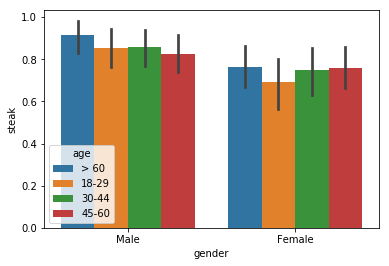

In [115]:
sns.barplot(x="gender",y = "steak", hue = "age", data = steak)

The graph above is also extremley interesting. So, out of those who took this survey, males who above 60 have a strong correlation with eating more steak. 

**Data Modeling Part 2: Combining Binary Data**

The graphs which I modeled above were extremley helpful for pointing out a lot of pretty basic correlations. I was able to understand relationships between some direct risk factors and even overlap them by declaring a hue. However initially helpful this kind of data searching was, I wanted to overlap my binary data in order to see even more. Maybe smoking will have no correlation to eating steak, but maybe smoking and skydiving will! I really wanted to overlap these binary columns into something else to provide even more insight into what I was exploring here. 

Additionally, I began to think about I could display my data beyond a bar graph. Maybe a heat map would be helpful! 
In the below section, I begin to explore these ideas to get even more out of the binary data I began with. 

In [116]:
#creating smoking and gambling
steak["smoke and gamble"] = steak["smoke"] + steak["gamble"]
#steak.head()


It took me a long time to print the data of the combined columns. After some work with notation surrounding if statements, Ms. Sconyers helped me find a way to create 1,2,3,4 answers based on the responses of the two columns.
Here is a the key for the combined column:
- No smoke, no gamble = 1
- Yes smoke, no gamble = 2
- No smoke, yes gamble = 3
- Yes smoke, yes gamble = 4

I eventually, with help from Ms. Sconyers, decided on using the lambda function, apply method, along with combo function to create a series of if and elif statements to base my data off of. Note: the reason the final elif statement is NOT an else is because of the null data. 



In [117]:
#still have to differntiate smoking and no gamble and no smoke and gamble (these now are both under the number 1)
#but, my code above did read in 0 as niether and 2 as both! 
#My next step needs to be differentiating these two things 

#No smoke no gamble = 1
#yes somke no gamble = 2
#no smoke yes gamble = 3
#yes smoke yes gamble = 4

#for i in steak:
    
    #if (steak.index[0], steak.columns[2]) == 0 and (steak.index[0], steak.columns[4]) == 0:
        #steak["smoke and gamble"] == 1
    #elif (steak.index[0], steak.columns[2]) == 1 and (steak.index[0], steak.columns[4]) == 0:
        #steak["smoke and gamble"] == 2
    
    #elif (steak.index[0], steak.columns[2]) == 0 and (steak.index[0], steak.columns[4]) == 1:
        #steak["smoke and gamble"] == 3

    #else:
        #steak["smoke and gamble"] == 4
        
#the if statments above did not work, so I used the below lambda function with help from 
#Ms.Sconyers
#Also note: the reason my else is not 4 is because then NaN values would also be printed as 4s 
        
def combo(a,b):
    if a == 0 and b == 0:
        return 1
    elif a == 1 and b == 0:
        return 2
    elif a ==0 and b ==1:
        return 3
    elif a == 1 and b == 1:
        return 4
    
steak['smoke and gamble'] = steak.apply(lambda x: combo(x['smoke'],x['gamble']), axis =1)
    
#steak.head()


Now that I have combined the two risk factors of smoking and gambling in a column, I can produce graphs with those overlapping risk factors!!

Graphing eating steak with Smoking AND gambling

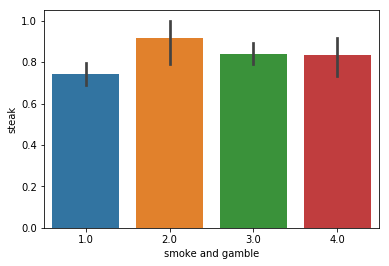

In [118]:
sns.barplot(x="smoke and gamble", y = "steak", data = steak)

Interesting! This tells me off the bat that out of the people who filled out this FiveThirtyEight survey, the risk factor of smoking and gambling together does not correlate much to eating steak. In fact, those who filled out the survey who smoked but did not gamble were more likley to eat steak!

Next, I tried combining this with skydiving to combine those who smoke and gamble and those who skydive with if they eat steak or not.

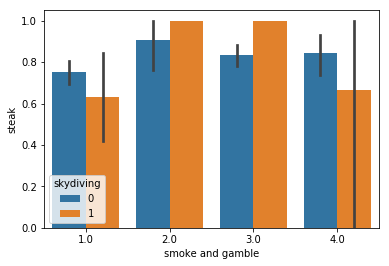

In [119]:
sns.barplot(x="smoke and gamble", y= "steak", hue = "skydiving", data = steak)

This graph is really interesting, as it displays really no correlation between smoking and gambling and skydiving with eating steak. Still, those who DO smoke but DO NOT gamble but DO skydive display the most promiment correlation with eating steak! 

Now that I have learned how to combine risk factors, I am going to combine even more to see what I can find!

In [120]:
#creating smoking and cheating
steak["smoke and cheated"] = steak["smoke"] + steak["cheated"]
#steak.head()

In [121]:
#No smoke no cheat = 1
#yes smoke no cheat = 2
#no smoke yes cheat = 3
#yes smoke yes cheat = 4

def combo(a,b):
    if a == 0 and b == 0:
        return 1
    elif a == 1 and b == 0:
        return 2
    elif a ==0 and b ==1:
        return 3
    elif a == 1 and b == 1:
        return 4
    
steak['smoke and cheated'] = steak.apply(lambda x: combo(x['smoke'],x['cheated']), axis =1)

#steak.tail()
    

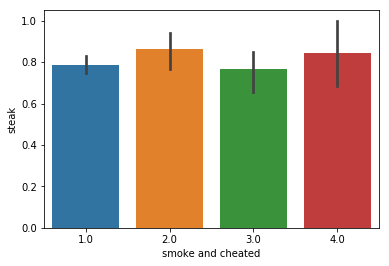

In [123]:
sns.barplot(x="smoke and cheated", y= "steak", data = steak)

This was interesting, as there was a small margin of correlation for those who smoke and cheat and eat steak. However, thinking back to some of our original graphs, this doesn't particularly tell us anything new- as we know that smoke correlates with eating steak, but cheating does not. I went onto investigate more interesting data combinations.

Combining more risk factors! This time, I combined and coded results for speeding and alchohol.

In [124]:
steak["speeding and alcohol"] = steak["speeding"] + steak["alcohol"]
#steak.head()

In [125]:
#No speed no alcohol = 1
#yes speed no alcohol = 2
#no speed yes alcohol = 3
#yes speed yes alcohol = 4

def combo(a,b):
    if a == 0 and b == 0:
        return 1
    elif a == 1 and b == 0:
        return 2
    elif a ==0 and b ==1:
        return 3
    elif a == 1 and b == 1:
        return 4
    
steak['speeding and alcohol'] = steak.apply(lambda x: combo(x['speeding'],x['alcohol']), axis =1)

#steak.tail()

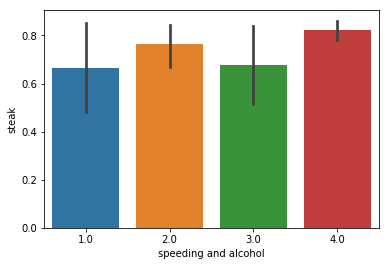

In [126]:
sns.barplot(x="speeding and alcohol", y= "steak", data = steak)

Interesting! This displays that if you speed and drink, you are more likley to eat steak. This correlation is obvious by a pretty significant margin. 

Note: after experimenting with other graphs (heat maps, scatters, etc.), I found that the graph was BY FAR the best way to display the data I worked with throughout this lab. 

**Data Analysis and Conclusion:**

Overall, there are lots of factors that play into the eating of steak for those who took the survey. I came to a fair amount of conclusions. Before I combined lots of risk factors, I came to a fair amount of more general conclusions which I was able to extend when I combined multiple data sets. 

**Conclusions prior to combining data sets:**

Out of those who filled out the survey...
- If you are a male over 60, you have the highest correlation of eating steak
- If your income lands in the range of 100,000-149,999, highest correlation of eating steak
- if you live in pacific regions, you have the weakest correlation to eating steak 
- If you have a high school degree, college degree, or graduate degree, you have roughly the same strong correlation to eating steak (if you have less than a high school degree, you are less likley to eat steak)
- if you are a female who has less than a high school degree, you are more likley eat steak (outlier here)
- Overall, males have a stronger correlation of eating steak than females

On risk factors (direct correlations with huing):
- The more alcohol you consume, the higher your correlation to eating steak
- if you gamble and drink, you are more likley to eat steak
- if you speed, more likley to eat steak 
- Those who cheated were less likley to have eaten steak 


**Conclusions post-combining data sets:**

- Those who smoke but do not gamble displayed strong correlation to eating steak
- Those who smoke, do not gamble, but skydive also displayed a strong correlation to eating steak
- Those who speed and drink alcohol also display a significant correlation to eating steak

**Overall Conclusion:**

I learned a lot from this lab about correlation between data points and surveying. Overall, I cannot come to any kind of a conclusion surrounding all risk factors and eating steak. But through my process, I came to more interesting, specific conclusions. If you are male and over 60, according to the survey, you have the highest correlation of eating steak. If you land in the income range of $100,000-149,999, you are have the highest correlation of incomes of eating steak. If you live in pacific regions, you are much less likley to eat steak (by a significant margin). As you can see in my lists above, I came to a few specific conclusions about my survey takers and learned alot about overlapping binary data. Overall, although taking the risks listed in the survey did not all directly correlate to eating steak, lots of specific elements did! This makes me think of a few broader questions: What would this dataset look like if we reached out to more people across more regions of the United States? How would the graphs above change? What if we didn't have binary data, but it was a scale from 1-5: How often do you drink alcohol? How many times do you skydive? How often do you eat steak? etc. Overall, however, I did gain alot from the material I had even if I didn't reach the conclusion I assumed I would when I started off with the dataset. 


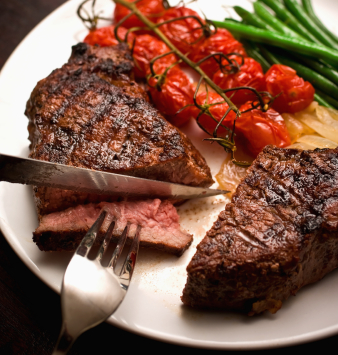

In [127]:
#display image from computer with .display method
#import Image
#then, set wideth and height 
from IPython.display import Image
steakpic = Image(filename="steak.jpg", width=200, height=200)
steakpic

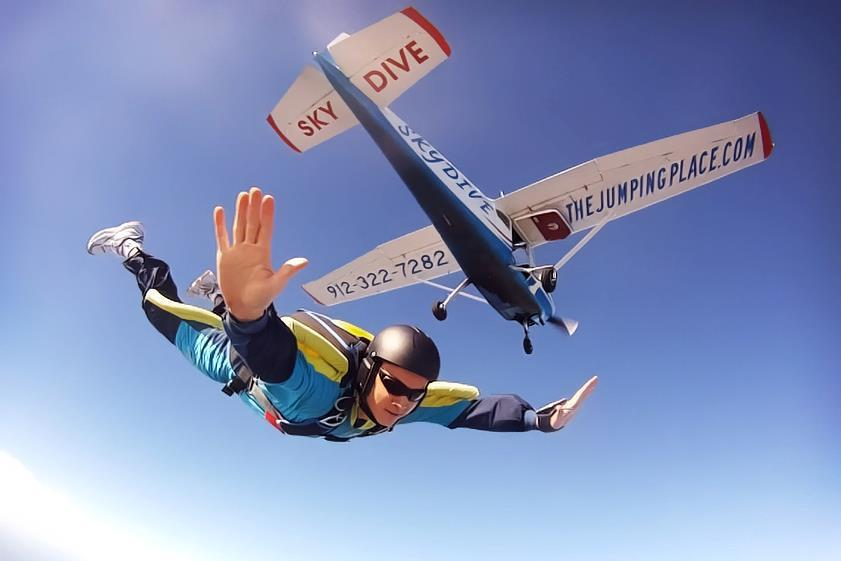

In [128]:
#display image from computer with .display method
#import Image
from IPython.display import Image
skydivingpic = Image(filename="skydive.jpg", width=200, height=200)
skydivingpic

**Further Exploration:**

Looking back at Nate Silvers results (I wanted to look at these after I had conducted my own analysis), I realize that he came to a similar dead-end I did when attempting to find a coorelation between all of the risk factors and eating steak. He tested a lot of information on how people like their steak cooked, a column which I ended up not using. I found this pretty interesting, although there was no correlation whatsoever. 

Nate Silver's Graph:

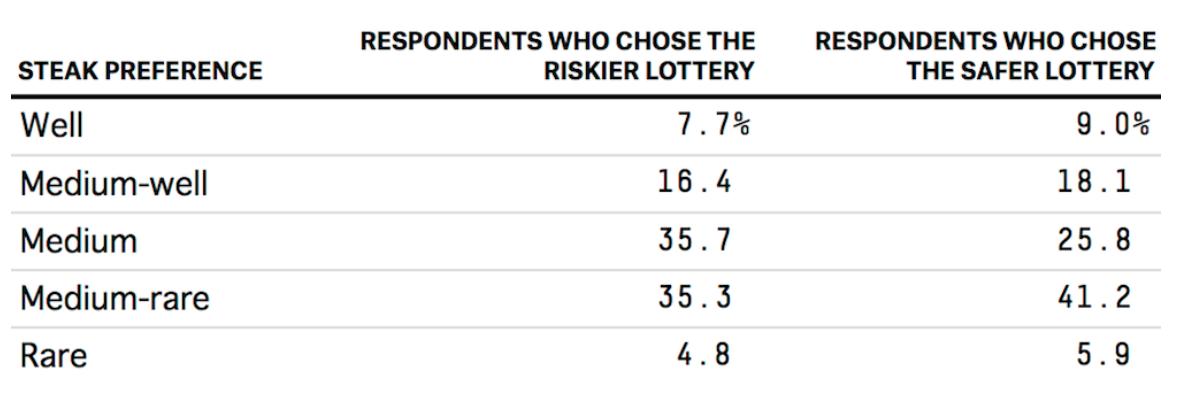

In [133]:
#display image from computer with .display method
#import Image
from IPython.display import Image
graph = Image(filename="silversgraph.png", width=500, height=500)
graph


Overall, although the conclusions I reached were not completley how I expected they would be, I was pleasantly surprised with how much I learned! 

My dataset raised a lot of questions for me surounding trends of eating steak. I decided to do some more research to answer some of these questions and confirm some conclusions I made throughout the lab. It is interesting to compare eating red meat to taking risks, because, in a way, eating red meat (especially steak) in the first place is a small health risk.

Some of other interesting sites are listed below if you would like to take a look: 

From a Harvard editorial: https://www.health.harvard.edu/healthbeat/whats-the-beef-with-red-meat 

From the National Library of Medicine & National Institution of Health: 

on income and red meat:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4974628/ 

on gender identification and red meat:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5920154/

From the Washington Post on gender and meat: https://www.washingtonpost.com/lifestyle/wellness/is-meat-manly-how-society-pressures-us-to-make-gendered-food-choices/2017/01/24/84669506-dce1-11e6-918c-99ede3c8cafa_story.html?utm_term=.616486ed63fa




**Used Sites:**

https://seaborn.pydata.org/generated/seaborn.barplot.html 

https://seaborn.pydata.org/tutorial/distributions.html

https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python

Photo credits:

http://www.thejumpingplace.com/product/uspa-a-license-course/ 

http://chefsblade.monster.com/news/articles/340-why-i-eat-meat-and-why-you-should-too

**Acknowledgements:**

Ms. Sconyers helped me a lot when understanding that replacing NaN with x was both inefficient and was the source of my errors. She also aided me in understanding how to combine multiple binary data columns together into one column to work at overlaping my data to try and understand even more about my dataset! I also learned the cool code to import photos from Julia. 